# Лабораторная работа №3
# Дифференциальные уравнения

## Задание 1. Модель "хищник-жертва"

Имеются два биологических вида численностью в момент времени $t$ соответственно $x(t)$ и $y(t)$. Особи первого вида являются пищей для особей второго вида (хищников). Численности популяций в начальный момент времени известны. Требуется определить численность видов в произвольный момент времени. 

Математической моделью задачи является система дифференциальных уравнений Лотки – Вольтерра:
\begin{cases}
    \large{\frac{dx}{dt} = (a-by)x} \\
    \large{\frac{dy}{dt} = (-c+dx)y}
\end{cases}

где $a, b, c, d$ – положительные константы. Проведем расчет численности популяций при $a = 3, c = 1, d = 1$ для трех значений параметра $b = 4;3;2$. Начальные значения положим $x(0) = 2, y(0) = 1$.

**Задание**. Переписать следующий код, используя функции SageMath.

#### Исходный код

(0.0, 3.0)

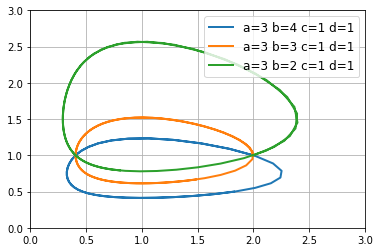

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def f(y, t,params):
    y1, y2 = y
    a, b, c, d = params
    return [y1 * (a - b*y2), y2 * (-c + d*y1)]


t = np.linspace(0, 7, 71)
y0 = [2, 1]
fig = plt.figure(facecolor='white')

for b in range(4, 1, -1):
    params = [3, b, 1, 1]
    st = 'a=%d b=%d c=%d d=%d' % tuple(params)
    [y1,y2] = odeint(f, y0, t,args=(params,), full_output=False).T
    plt.plot(y1, y2, linewidth=2, label=st)

plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0,3)
plt.ylim(0,3)

#### Новый код

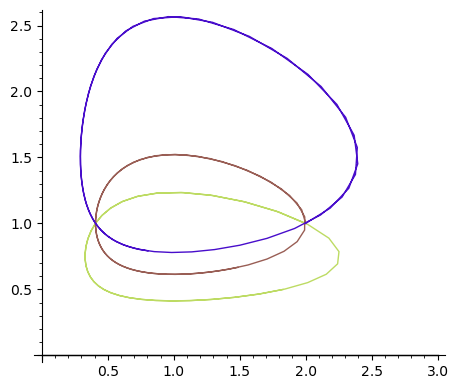

In [2]:
import numpy as np

var("y1, y2")

t = np.linspace(0, 7, 71) # интервал, на котором будем искать решение
y0 = [2, 1] # начальные условия
a, c, d = 3, 1, 1 # параметры для функции

pt = plot(0, (x, 0, 3), color='black')

for b in range(4, 1, -1):
    params = [a, b, c, d]
    st = 'a=%d b=%d c=%d d=%d' % tuple(params)
    f = [y1 * (a - b*y2), y2 * (-c + d*y1)]
    solution = desolve_odeint(f, y0, t, dvars = [y1, y2]) 
    # desolve_odeint(функция, нач. условия, интервал поиска решения, неизвестные) - численно решить диффур
    pt += line(solution, rgbcolor=(randint(0, 256) / 256, randint(0, 256) / 256, randint(0, 256) / 256))

pt.show(aspect_ratio=1)

Результаты работы двух программ совпали.

## Задание 2. Моделирование движения тела, брошенного под углом к горизонту

Решается задача Коши, описывающая движение тела, брошенного с начальной скоростью $v_0$ под углом $\alpha$ к горизонту в предположении, что сопротивление воздуха пропорционально квадрату скорости. В векторной форме уравнение движения имеет вид


$$\large{m\ddot{r} = - \gamma v |v|-mg}$$

где $r(t)$ радиус – вектор движущегося тела, $v = \dot{r}(t)$ – вектор скорости тела, $\gamma$ – коэффициент сопротивления, $mg$ вектор силы веса тела массы $m$, $g$ – ускорение свободного падения.

Обозначим $k = \gamma / m$. Задача сводится к решению системы ДУ:
\begin{cases}
    y_1^\prime = y2 \\
    y_2^\prime = -ky_2 \sqrt{y_2^2+y_4^2} \\
    y_3^\prime = y4 \\
    y_4^\prime = -ky_4 \sqrt{y_2^2+y_4^2}-g
\end{cases}

Начальные условия: $x(0) = 0, y(0) = h$(h начальная высота), $\dot{x}(0) = v_0cos\alpha, \dot{y}(0) = v_0sin\alpha$.

Положим $h=0, k=0.01, g=9.81, v_0=10, \alpha=\pi/4$.

**Задание**. Переписать следующий код, используя функции SageMath.

#### Исходный код

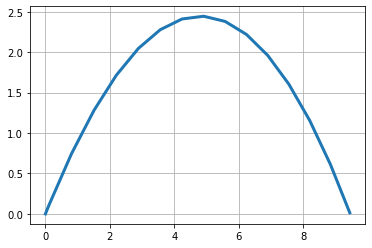

In [3]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

ts = []
ys = []


def fout(t, y): # обработчик шага
    ts.append(t)
    ys.append(list(y.copy()))


def f(t, y): # функция правой части системы ОДУ
    k = 0.01
    g = 9.81
    y1, y2, y3, y4 = y
    return [y2, -k * y2 * sqrt(y2**2 + y4**2), y4, -k * y4 * sqrt(y2**2 + y4**2) - g]


tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi/4 # угол бросания тела
v0 = 10.0 # начальная скорость

ODE = ode(f)
y0, t0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)], 0 # начальные условия
r = ODE.set_integrator('dopri5', max_step=0.1) # метод Рунге – Кутта
r.set_solout(fout) # загрузка обработчика шага
r = ODE.set_initial_value(y0, t0) # задание начальных значений
ret = r.integrate(tmax) # решаем ОДУ
Y = np.array(ys)
fig, ax = plt.subplots()
fig.set_facecolor('white')
ax.plot(Y[:,0],Y[:,2],linewidth=3) # график решения
ax.grid(True)

#### Новый код

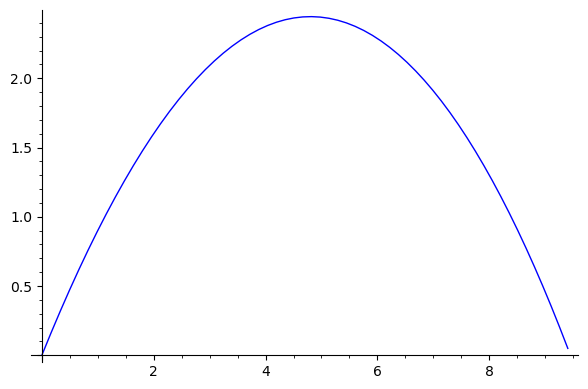

In [4]:
import numpy as np

var("y1, y2, y3, y4")

t = np.linspace(0, 7, 300) # интервал, на котором ищем решения
tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi/4 # угол бросания тела
k = 0.01
g = 9.81
v0 = 10.0 # начальная скорость

y0, t0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)], 0 # начальные условия
f = [y2, 
     -k * y2 * sqrt(y2**2 + y4**2), 
     y4, 
     -k * y4 * sqrt(y2**2 + y4**2) - g] # система функций

solution = desolve_odeint(f, y0, t, dvars=[y1, y2, y3, y4]) # решаем диффуры численно

arr = [[row[0], row[2]] for row in solution if row[0] >= 0 and row[2] >= 0]
line(arr).show()

Результаты работы двух программ совпали.